In [130]:
import pandas as pd
telcom = pd.read_csv('C:/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [131]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.express as px
import cufflinks as cf

In [132]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [133]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [134]:
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


왜 total charge가 없을까

#  
# EDA / Preprocessing

In [135]:
telcom[telcom["TotalCharges"]==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [136]:
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

In [137]:
telcom=telcom.dropna()
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [138]:
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)
telcom = telcom.reset_index()[telcom.columns] #인덱스 재설정
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [139]:
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [140]:
telcom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [141]:
telcom.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [142]:
telcom["Churn"].value_counts().values.tolist()

[5163, 1869]

In [143]:
trace = go.Pie(labels = ['Yes', 'No'],
               values = [5163, 1869],
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer Churn Percentage in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(223,222,213)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [144]:
def histo(*X):
    sns.set(style="darkgrid")
    fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(18, 10)
    sns.countplot(data=telcom, x=X[0], hue="Churn", ax=ax1)
    sns.countplot(data=telcom, x=X[1], hue="Churn", ax=ax2)
    sns.countplot(data=telcom, x=X[2], hue="Churn", ax=ax3)
    sns.countplot(data=telcom, x=X[3], hue="Churn", ax=ax4)
    
def histogram(column) :
    trace1 = go.Histogram(x  = telcom.loc[telcom['Churn']=='No', column], #Churn이 Yes인 gender의 행만 가져오므로 loc
                          histnorm= "percent",
                          name = "Non Churn Customers",
                          marker = dict(line = dict(width = .5, color = "black")),
                          opacity = .9 
                          ) 
    
    trace2 = go.Histogram(x  = telcom.loc[telcom['Churn']=='Yes', column],
                          histnorm = "percent",
                          name = "churn customers",
                          marker = dict(line = dict(width = .5,color = "black")),
                          opacity = .9
                          )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer churn",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

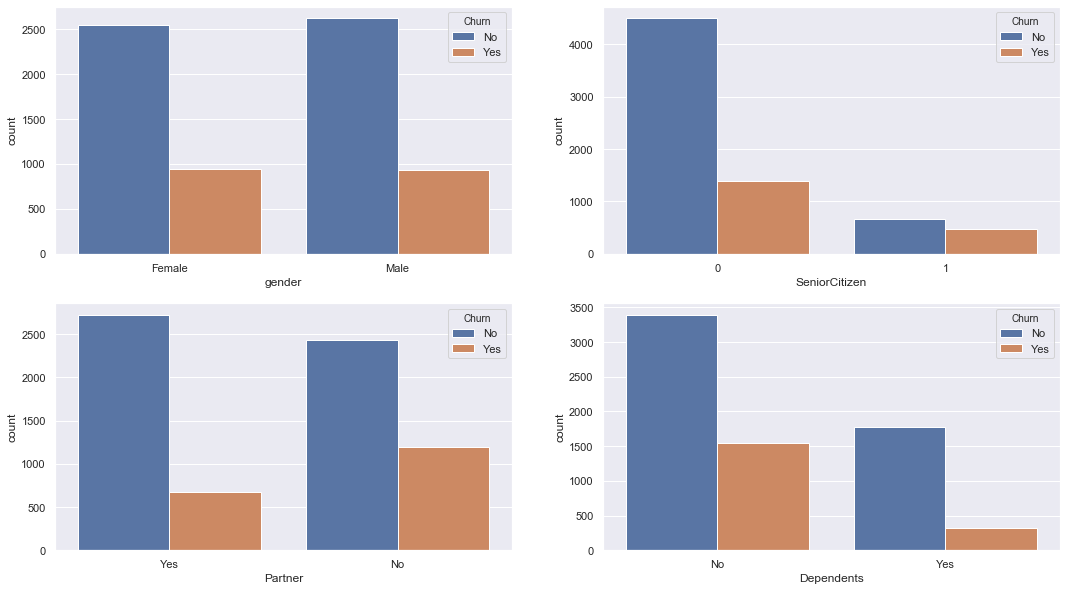

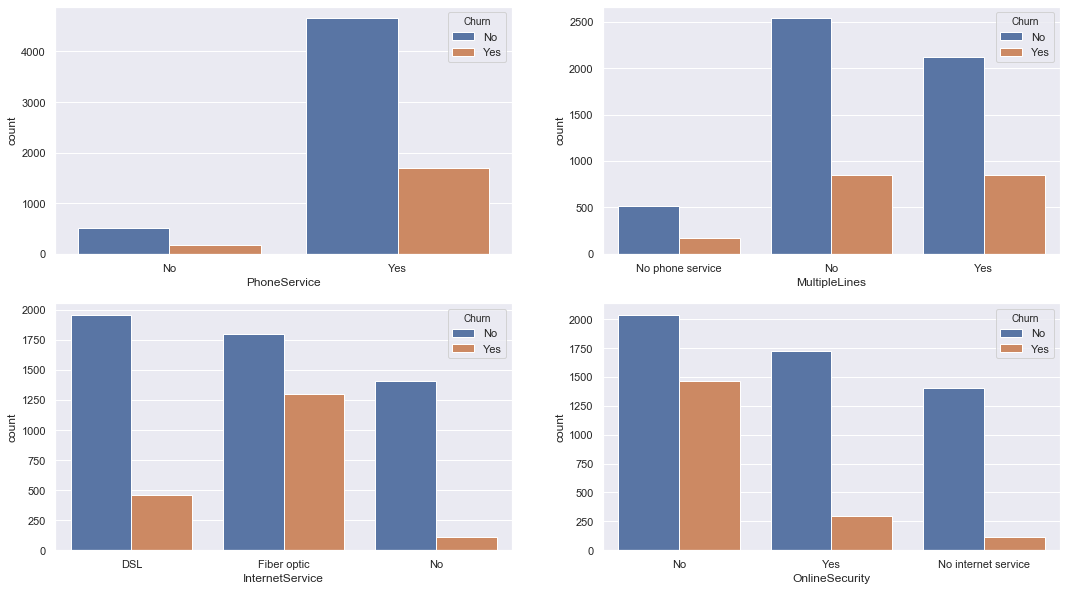

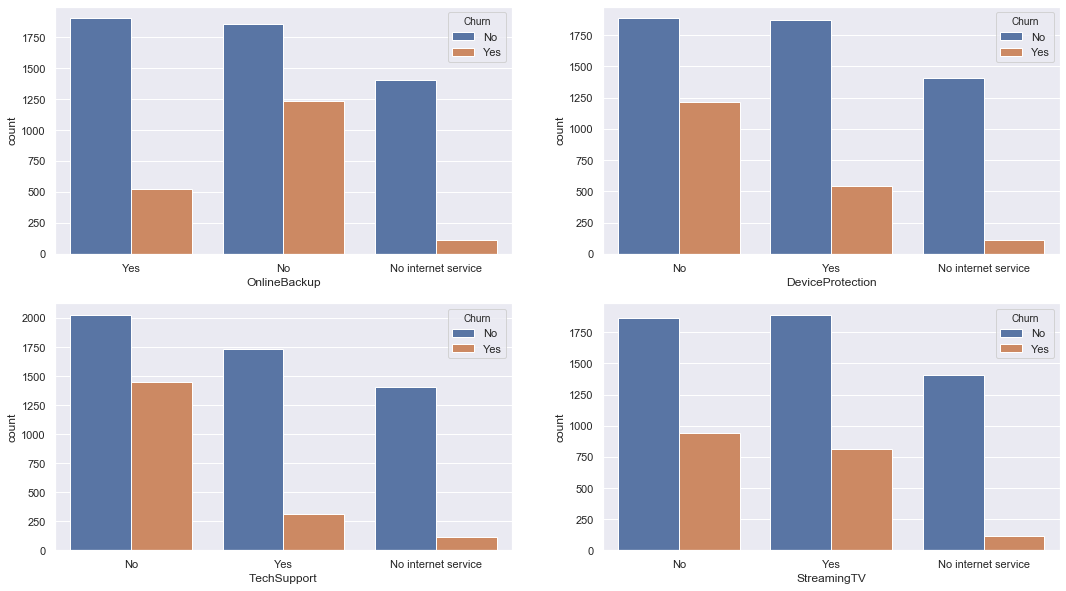

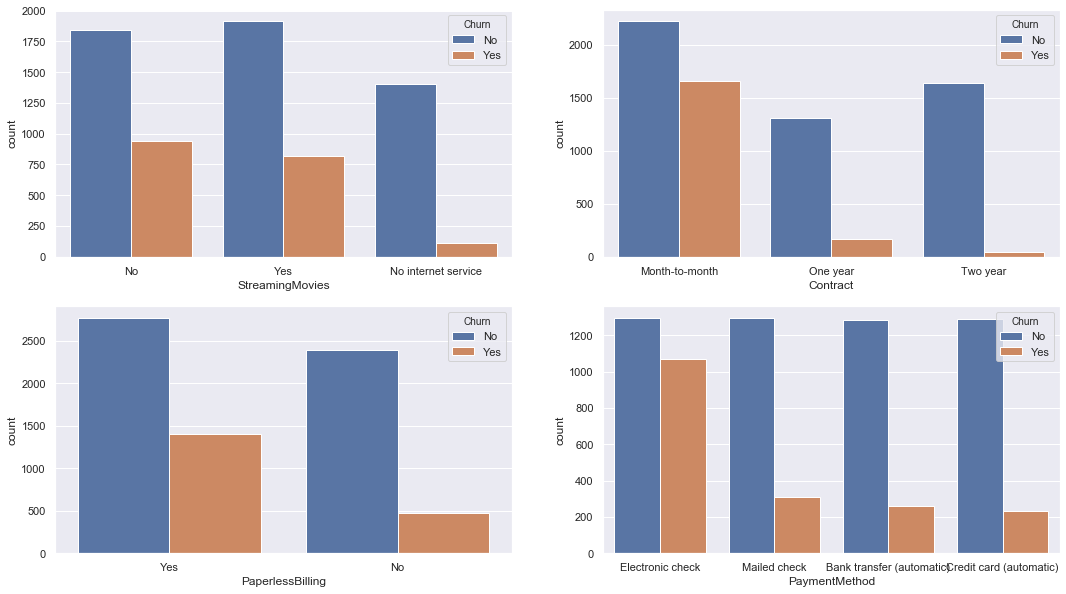

In [145]:
cols=telcom.columns.drop('customerID').drop('Churn')

col_4 = []
for i in range(len(cols)):
    if telcom[cols[i]].nunique()<=4:
        col_4.append(cols[i])
    if len(col_4)==4:
        histo(col_4[0], col_4[1], col_4[2], col_4[3])
        col_4=[]

for i in range(len(cols)):
    if telcom[cols[i]].nunique()>4:
        histogram(cols[i])

In [146]:
telcom['No Techsupport']=telcom['TechSupport']=='No'
telcom['Yes Techsupport']=telcom['TechSupport']=='Yes'
telcom=telcom.drop('TechSupport', axis=1)

In [147]:
telcom['No Backup']=telcom['OnlineBackup']=='No'
telcom['Yes Backup']=telcom['OnlineBackup']=='Yes'
telcom=telcom.drop('OnlineBackup', axis=1)

In [148]:
telcom['No Security']=telcom['OnlineSecurity']=='No'
telcom['Yes Security']=telcom['OnlineSecurity']=='Yes'
telcom=telcom.drop('OnlineSecurity',axis=1)

In [149]:
telcom['No Protect']=telcom['DeviceProtection']=='No'
telcom['Yes Protect']=telcom['DeviceProtection']=='Yes'
telcom=telcom.drop('DeviceProtection', axis=1)

In [150]:
telcom['DSL']   =telcom['InternetService']=='DSL'
telcom['Fiber optic']   =telcom['InternetService']=='Fiber optic'
telcom['No internet service']   =telcom['InternetService']=='No internet service'
telcom=telcom.drop('InternetService', axis=1)

In [151]:
telcom['Month-to-month']   =telcom['Contract']=='Month-to-month'
telcom['One year']=telcom['Contract']=='One year'
telcom['Two year']         =telcom['Contract']=='Two year'
telcom=telcom.drop('Contract',axis=1)

In [152]:
'''
telcom['Electronic check']   =telcom['PaymentMethod']=='Electronic check'
telcom['Mailed check']       =telcom['PaymentMethod']=='Mailed check'
telcom['Bank transfer']      =telcom['PaymentMethod']=='Bank transfer (automatic)'
telcom['Credit card']        =telcom['PaymentMethod']=='Credit card (automatic)'
'''

payment_dummies = pd.get_dummies(telcom['PaymentMethod']) # one-hot encoding. 알아서 열 이름을 지정해줌
telcom=telcom.drop('PaymentMethod',axis=1)
payment_dummies

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7027,0,0,0,1
7028,0,1,0,0
7029,0,0,1,0
7030,0,0,0,1


In [153]:
telcom=pd.concat([telcom, payment_dummies], axis=1)

In [154]:
cols=telcom.columns.drop('customerID')
from sklearn.preprocessing import LabelEncoder #범주형 데이터를 숫자형으로 Labeling
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
for i in [col for col in cols if telcom[col].nunique()==2] : #값이 2개 뿐이므로 one-hot으로 2개의 col을 만들필요없이 0과1로 labeling
    telcom[i] = le.fit_transform(telcom[i])
    
# one-hot      - [a,b,c,d] -> [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]
# LabelEncoder - [a,b,c,d] -> [0],[1],[2],[3]

In [155]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,StreamingTV,StreamingMovies,...,DSL,Fiber optic,No internet service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,No phone service,No,No,...,1,0,False,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,No,No,...,1,0,False,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,No,No,No,...,1,0,False,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,No,No,...,1,0,False,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,No,No,...,0,1,False,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,Yes,Yes,Yes,...,1,0,False,0,1,0,0,0,0,1
7028,2234-XADUH,0,0,1,1,72,1,Yes,Yes,Yes,...,0,1,False,0,1,0,0,1,0,0
7029,4801-JZAZL,0,0,1,1,11,0,No phone service,No,No,...,1,0,False,1,0,0,0,0,1,0
7030,8361-LTMKD,1,1,1,0,4,1,Yes,No,No,...,0,1,False,1,0,0,0,0,0,1


In [156]:
numeric_cols=[]
for i in [col for col in cols if telcom[col].nunique()>4] :
    print(i)
    numeric_cols.append(i)

std = StandardScaler()
scaled = std.fit_transform(telcom[numeric_cols])
scaled = pd.DataFrame(scaled,columns=numeric_cols)

tenure
MonthlyCharges
TotalCharges


In [157]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [158]:
telcom = telcom.drop(columns = numeric_cols,axis = 1)
telcom = pd.concat([telcom, scaled], axis=1)
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,StreamingTV,StreamingMovies,PaperlessBilling,...,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,No phone service,No,No,1,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,No,No,No,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,No,No,No,1,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,No phone service,No,No,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,No,No,No,1,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,1,Yes,Yes,Yes,1,...,0,1,0,0,0,0,1,-0.343137,0.664868,-0.129180
7028,2234-XADUH,0,0,1,1,1,Yes,Yes,Yes,1,...,0,1,0,0,1,0,0,1.612573,1.276493,2.241056
7029,4801-JZAZL,0,0,1,1,0,No phone service,No,No,1,...,1,0,0,0,0,1,0,-0.872808,-1.170004,-0.854514
7030,8361-LTMKD,1,1,1,0,1,Yes,No,No,1,...,1,0,0,0,0,0,1,-1.158016,0.319168,-0.872095


In [159]:
telcom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Churn', 'No Techsupport', 'Yes Techsupport',
       'No Backup', 'Yes Backup', 'No Security', 'Yes Security', 'No Protect',
       'Yes Protect', 'DSL', 'Fiber optic', 'No internet service',
       'Month-to-month', 'One year', 'Two year', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [160]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array, #상관계수 값을 따라 색이 나타남
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Correlation coefficient", titleside = "right") ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 110, t = 25,b = 100,), #여유. right, left, top ,bottom
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

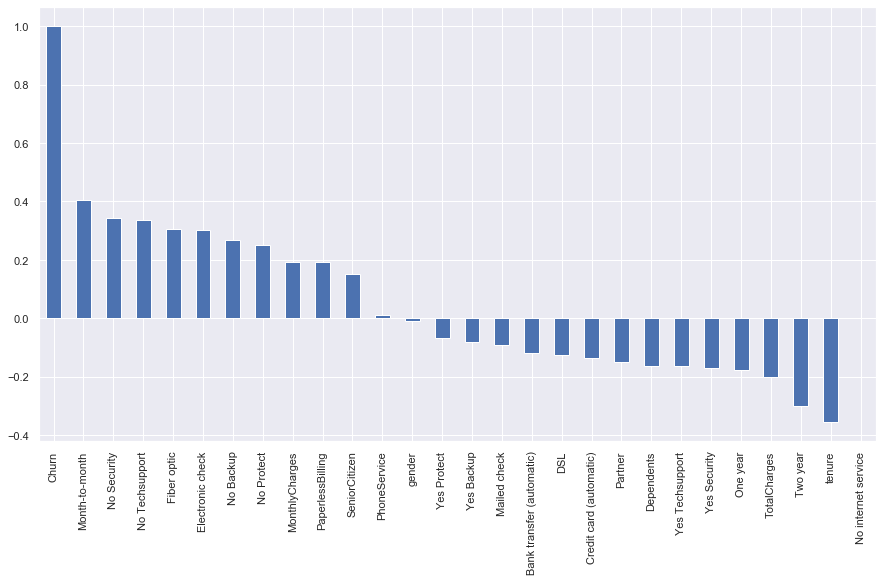

In [161]:
plt.figure(figsize=(15,8))
telcom.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [162]:
telcom.corr()['Churn'].sort_values(ascending = False)

Churn                        1.000000
Month-to-month               0.404565
No Security                  0.342235
No Techsupport               0.336877
Fiber optic                  0.307463
Electronic check             0.301455
No Backup                    0.267595
No Protect                   0.252056
MonthlyCharges               0.192858
PaperlessBilling             0.191454
SeniorCitizen                0.150541
PhoneService                 0.011691
gender                      -0.008545
Yes Protect                 -0.066193
Yes Backup                  -0.082307
Mailed check                -0.090773
Bank transfer (automatic)   -0.118136
DSL                         -0.124141
Credit card (automatic)     -0.134687
Partner                     -0.149982
Dependents                  -0.163128
Yes Techsupport             -0.164716
Yes Security                -0.171270
One year                    -0.178225
TotalCharges                -0.199484
Two year                    -0.301552
tenure      

#  
# Fitting the model

## Logistic Regression

In [163]:
features=['Month-to-month', 'No Security', 'No Techsupport', 'Fiber optic', 'Electronic check', 'No Backup','No Protect',
          'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen','TotalCharges','tenure', 'One year','Two year', 'Yes Security', 
          'Yes Techsupport', 'Dependents','No internet service'
]

label='Churn'

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [165]:
X_train, X_test, y_train, y_test = train_test_split(telcom[features], telcom[label], test_size = 0.3, random_state = 101)
logit  =  LogisticRegression(random_state=7)

In [166]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
predicted = logit.predict(X_test)

TP = 이탈했는데 이탈했다고 판단  
TN = 남아있는데 남아있다고 판단  
  
FP = 남아있는데 이탈했다고 판단  
FN = 이탈했는데 남아있다고 판단  
  
상황/판단  
T : 맞춤      F : 틀림  
P : 했다고함  N : 안했다고함  

In [168]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
#이탈했다고 내가 판단한 사람중 진짜 이탈한 비율
print('accuracy ', accuracy_score(y_test,predicted) ) #정확도 : 예측이 정답과 얼마나 정확한가?

#전체에서 맞춘비율
print('precision', precision_score(y_test,predicted) )#정밀도 : 예측한 것중에 정답의 비율은?

#이탈한 사람중 내가 맞힌 비율
print('recall   ', recall_score(y_test,predicted) )#재현율 : 찾아야 할 것중에 실제로 찾은 비율은?

#precision과 recall의 조화평균
print('f1_score ', f1_score(y_test,predicted) )#F1 Score : 정밀도와 재현율의 평균 (성능)

accuracy  0.8075829383886256
precision 0.6383928571428571
recall    0.539622641509434
f1_score  0.5848670756646217


## 앙상블 기법  
동일한 학습 알고리즘을 사용해서 여러 모델을 학습하는 개념  
overfitting과 underfitting을 줄임  
Bagging 과 Boosting 등등

## - Bagging (Bootstrap Aggregating)
Bagging은 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과를 집계(Aggregating) 하는 방법  
boot strapping : 각자의 방식으로 data를 sampling하여 샘플을 만든다.  

ex) Randomforest

## - Boosting  
가중치 평균을 사용하여 약한 학습자를 더 강력한 학습자로 만드는 알고리즘 그룹을 말한다.  
"teamwork"에 관한 것  
실행되는 각 모델은 다음 모델에 집중할 feature을 결정한다  
차례대로 하나는 다른 것으로부터 배우고, learning을 boosting함  

ex) XGBOOST



## Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
NonTunning_RF = RandomForestClassifier(n_estimators=300, random_state=7)
NonTunning_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [170]:
predicted = NonTunning_RF.predict(X_test)

In [171]:
print('accuracy ', accuracy_score(y_test,predicted) )

print('precision', precision_score(y_test,predicted) )

print('recall   ', recall_score(y_test,predicted) )

print('f1_score ', f1_score(y_test,predicted) )

accuracy  0.790521327014218
precision 0.5986547085201793
recall    0.5037735849056604
f1_score  0.5471311475409835


In [172]:
#gird serach
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

# 분류기 생성
RF = RandomForestClassifier(n_estimators=300,#의사결정 나무 수
                            oob_score=True,#out-of-bag 으로 정확도 측정.
                            #oob : 이 데이터의 실제 값과 각 트리로 부터 나온 예측 결과 사이의 오차 
                            )

# 초모수 격자 생성. 연산 비용이 높으므로 그리드 간격을 넓게
RF_param_grid= {'max_depth' : np.arange(3,10,2),
             'max_features' : np.arange(0.2, 0.9, 0.2),
             'min_samples_leaf' : [1,3,5], #리프노드가 되기 위한 최소 데이터 수(default=1)
             'min_samples_split': [2,4,6]} #노드를 분할하기 위한 최소한의 데이터 수(default=2)

cv=KFold(5, shuffle=True, random_state=7)

# Create a GridSearchCV object
RF_grid = GridSearchCV(RF, param_grid = RF_param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=2)#verbose로 로그정보량 제한

RF_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  4.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score

In [173]:
print('final params', RF_grid.best_params_)

final params {'max_depth': 9, 'max_features': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [174]:
#https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative

In [175]:
predicted = RF_grid.predict(X_test)

In [176]:
#이탈했다고 내가 판단한 사람중 진짜 이탈한 비율 (정밀도)
print('accuracy ', accuracy_score(y_test,predicted) )

#전체에서 맞춘비율 (정확도)
print('precision', precision_score(y_test,predicted) )

#이탈한 사람중 내가 맞힌 비율 (재현율)
print('recall   ', recall_score(y_test,predicted) )

#precision과 recall의 조화평균
print('f1_score ', f1_score(y_test,predicted) )

accuracy  0.8137440758293839
precision 0.6611764705882353
recall    0.530188679245283
f1_score  0.58848167539267


# XGBOOST

In [177]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [178]:
XGB = XGBClassifier()

param_grid={'booster' :['gbtree'],
                 'max_depth':[3,5,7,9],
                 'min_child_weight':[1,3,5,7],
                 'gamma':[0,3,6,9],
                 'colsample_bytree':[0.5,0,7,0.9],
                 'n_estimators':[300],
                 'objective':['binary:logistic'],
                 'scale_pos_weight':[1,3,5],
                 'eta':[0.1, 0.2],
                 'random_state':[2]}

cv=KFold(n_splits=5, random_state=777)

XGB = GridSearchCV(XGB, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)

XGB.fit(X_train.values, y_train.values)

print('final params', XGB.best_params_)
print('best score', XGB.best_score_)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


C:\Users\CE-L-113\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 6728 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done

final params {'booster': 'gbtree', 'colsample_bytree': 0.5, 'eta': 0.1, 'gamma': 9, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'objective': 'binary:logistic', 'random_state': 2, 'scale_pos_weight': 3}
best score 0.645984531400192


### XGBOOST Parameter 정리
□ General Parameters : XGBoost의 전반적인 기능을 정의함.  
 * booster [default=gbtree] >> 일반적으로 gbtree의 성능이 낫다.  
   - gbtree: tree-based models  
   - gblinear: linear models  
 * silent [default=0]  
   - 1: 동작 메시지를 프린트하지 않음.  

□ Booster Parameters (아래는 gbtree booster 기준으로 정리되어있음.)  
 * eta [default=0.3] => learning_rate  
   - GBM의 학습 속도와 유사.  
   - 각 단계에서 가중치를 줄임으로써 모델을 더 강건하게 만든다.  
   - 일반적으로 0.01-0.2  
 * min_child_weight [default=1] (Should be tuned using CV)  
   - child의 관측(?)에서 요구되는 최소 가중치의 합  
   - over-fitting vs under-fitting을 조정하기 위한 파라미터.  
   - 너무 큰 값이 주어지면 under-fitting.  
 * max_depth [default=6] (Should be tuned using CV)  
   - 트리의 최대 깊이.  
   - 일반적으로 3-10  
 * max_leaf_nodes  
   - 최종 노드의 최대 개수. (max number of terminal nodes)  
   - 이진 트리가 생성되기 때문에 max_depth가 6이면 max_leaf_nodes는 2^6개가 됨.  
 * gamma [default=0]  
   - 분할을 수행하는데 필요한 최소 손실 감소를 지정한다.  
   - 알고리즘을 보수적으로 만든다. loss function에 따라 조정해야 한다.  
 * subsample [default=1]  
   - 각 트리마다의 관측 데이터 샘플링 비율.  
   - 값을 적게 주면 over-fitting을 방지하지만 값을 너무 작게 주면 under-fitting.  
   - 일반적으로 0.5-1  
 * colsample_bytree [default=1]  
   - 각 트리마다의 feature 샘플링 비율.  
   - 일반적으로 0.5-1  
 * lambda [default=1] => reg_lambda  
   - 가중치에 대한 L2 정규화 용어 (Ridge 회귀 분석과 유사(?))  
 * alpha [default=0] => reg_alpha  
   - 가중치에 대한 L1 정규화 용어 (Lasso 회귀 분석과 유사(?))  
 * scale_pos_weight [default=1]  
   - 불균형한 경우 더 빠른 수렴(convergence)에 도움되므로 0보다 큰 값을 쓸것.  
  
□ Learning Task Parameters : 각 단계에서 계산할 최적화 목표를 정의하는 데 사용된다.  
 * objective [default=reg:linear]  
   - binary:logistic : 이진 분류를 위한 로지스틱 회귀, 예측된 확률을 반환한다. (not class)  
   - multi:softmax : softmax를 사용한 다중 클래스 분류, 예측된 클래스를 반환한다. (not probabilities)  
   - multi:softprob : softmax와 같지만 각 클래스에 대한 예상 확률을 반환한다.  
 * eval_metric [default according to objective]  
   - 회귀 분석인 경우 'rmse'를, 클래스 분류 문제인 경우 'error'를 default로 사용.  
   - rmse : root mean square error  
   - mae : mean absolute error  
   - logloss : negative log-likelihood  
   - error : Binary classification error rate (0.5 threshold)  
   - merror : Multiclass classification error rate  
   - mlogloss : Multiclass logloss  
   - auc : Area under the curve  
 * seed [default = 0]  
   - 난수 시드  
   - 재현 가능한 결과를 생성하고 파라미터 튜닝에도 사용할 수 있다.  

In [179]:
XGB.score(X_test.values, y_test.values)

0.611232676878191

In [180]:
predicted=XGB.predict(X_test.values)

In [181]:
print('accuracy ', accuracy_score(y_test,predicted) )

print('precision', precision_score(y_test,predicted) )

print('recall   ', recall_score(y_test,predicted) )

print('f1_score ', f1_score(y_test,predicted) )

accuracy  0.74739336492891
precision 0.4982164090368609
recall    0.7905660377358491
f1_score  0.611232676878191


#  
# Model Feature 분석

In [182]:
logit.coef_[0]

array([ 0.73039445,  0.36551872,  0.35127407,  0.53101147,  0.3798891 ,
        0.15577464,  0.05123381,  0.17707018,  0.30977083,  0.29414849,
        0.63671598, -1.29812259, -0.01574157, -0.71785392, -0.09560096,
       -0.0813563 , -0.12327342,  0.        ])

In [183]:
FI = pd.Series(abs(logit.coef_[0]), index= X_train.columns)
FI=FI.sort_values(ascending=False)
FI

tenure                 1.298123
Month-to-month         0.730394
Two year               0.717854
TotalCharges           0.636716
Fiber optic            0.531011
Electronic check       0.379889
No Security            0.365519
No Techsupport         0.351274
PaperlessBilling       0.309771
SeniorCitizen          0.294148
MonthlyCharges         0.177070
No Backup              0.155775
Dependents             0.123273
Yes Security           0.095601
Yes Techsupport        0.081356
No Protect             0.051234
One year               0.015742
No internet service    0.000000
dtype: float64

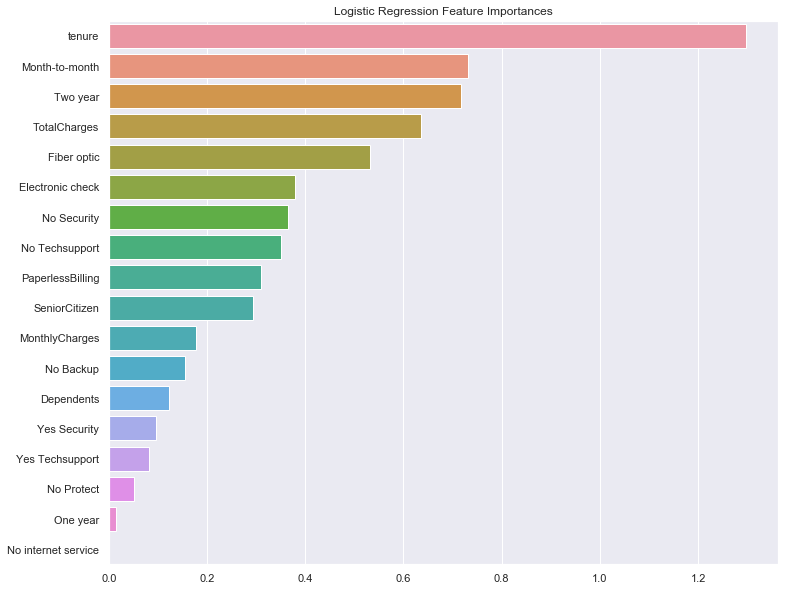

In [184]:
plt.figure(figsize=(12,10))
plt.title("Logistic Regression Feature Importances")
sns.barplot(x=FI, y = FI.keys())
plt.show()